<a href="https://colab.research.google.com/github/ChenghenChen/Slum/blob/main/OSM%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [2]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 929.6 kB/s eta 0:00:00


In [3]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [3]:
# to know the correct format we either guess or we go on the OSM website click on a point on their map to find out what it's called

In [5]:
https://www.openstreetmap.org/

SyntaxError: invalid syntax (<ipython-input-5-a583e92ee487>, line 1)

In [ ]:
# right click anywhere >> query function

In [4]:
PLACE_NAME = "Embajadores"
graph = osmnx.graph_from_place(PLACE_NAME)

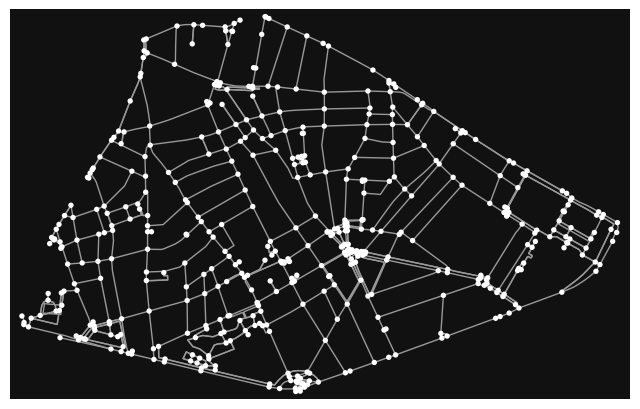

In [5]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [6]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-6-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

source  \
element_type osmid               
node         1517405732    NaN   
way          23571976      NaN   
             29993106      NaN   
             48761409      NaN   
             48761444      NaN   

                                                                  geometry  \
element_type osmid                                                           
node         1517405732                          POINT (-3.69544 40.40933)   
way          23571976    POLYGON ((-3.70992 40.40748, -3.70963 40.40749...   
             29993106    POLYGON ((-3.69480 40.40902, -3.69419 40.40984...   
             48761409    POLYGON ((-3.70361 40.40800, -3.70344 40.40775...   
             48761444    POLYGON ((-3.70023 40.40613, -3.70006 40.40619...   

                              amenity addr:city addr:housenumber  \
element_type osmid                                                 
node         1517405732           NaN    Madrid               51   
way          23571976             NaN       NaN              NaN   
             29993106    music_school    Madrid               53   
             48761409     marketplace       NaN              NaN   
             48761444             NaN    Madrid                2   

                        addr:postcode            addr:street  \
element_type osmid                                             
node         1517405732         28012  Calle de Santa Isabel   
way          23571976             NaN                    NaN   
             29993106           28012  Calle del Doctor Mata   
             48761409             NaN                    NaN   
             48761444           28012      Ronda de Valencia   

                                                                      name  \
element_type osmid                                                           
node         1517405732       Ilustre Colegio Oficial de Médicos de Madrid   
way          23571976                               Universidad Carlos III   
             29993106    Conservatorio Superior de Música Real Conserva...   
             48761409                              Mercado de San Fernando   
             48761444                                    La Casa Encendida   

                              office                  old_name  ...  url  \
element_type osmid                                              ...        
node         1517405732  association                       NaN  ...  NaN   
way          23571976            NaN  Mercado Puerta de Toledo  ...  NaN   
             29993106            NaN                       NaN  ...  NaN   
             48761409            NaN                       NaN  ...  NaN   
             48761444            NaN                       NaN  ...  NaN   

                        roof:material fixme level internet_access:operator  \
element_type osmid                                                           
node         1517405732           NaN   NaN   NaN                      NaN   
way          23571976             NaN   NaN   NaN                      NaN   
             29993106             NaN   NaN   NaN                      NaN   
             48761409             NaN   NaN   NaN                      NaN   
             48761444             NaN   NaN   NaN                      NaN   

                        brand:website construction_date ways type government  
element_type osmid                                                            
node         1517405732           NaN               NaN  NaN  NaN        NaN  
way          23571976             NaN               NaN  NaN  NaN        NaN  
             29993106             NaN               NaN  NaN  NaN        NaN  
             48761409             NaN               NaN  NaN  NaN        NaN  
             48761444             NaN               NaN  NaN  NaN        NaN  

[5 rows x 92 columns]

In [ ]:
# sometimes the buildings are just a point like "node" above instead of it being a contour (polygon) which would create empty spots in our plot

<Axes: >

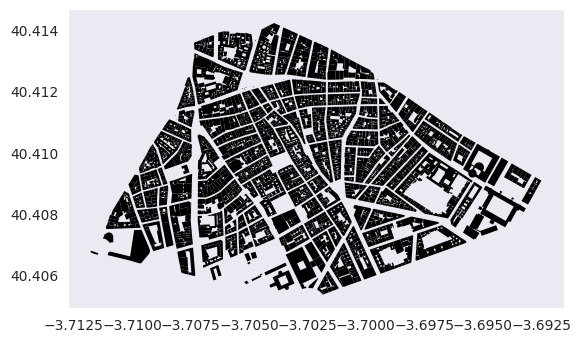

In [7]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [8]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
restaurants.head()

<ipython-input-8-995886824f10>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


amenity               name  \
element_type osmid                                      
node         167301973  restaurant  Fuente de la Fama   
             244755792  restaurant         Preity Raj   
             244757864  restaurant           A Cañada   
             244757871  restaurant         Raja Mahal   
             244757875  restaurant            Moharaj   

                                                             website  \
element_type osmid                                                     
node         167301973  http://www.restaurantefuentedelafama.com/es/   
             244755792                                           NaN   
             244757864                                           NaN   
             244757871                                           NaN   
             244757875                                           NaN   

                                         geometry created_by  \
element_type osmid                                             
node         167301973  POINT (-3.69781 40.41157)        NaN   
             244755792  POINT (-3.70086 40.41029)       JOSM   
             244757864  POINT (-3.70045 40.41097)        NaN   
             244757871  POINT (-3.70033 40.41114)        NaN   
             244757875  POINT (-3.70059 40.41109)        NaN   

                                     note addr:city addr:housenumber  \
element_type osmid                                                     
node         167301973                NaN       NaN              NaN   
             244755792  Restaurante Hindú       NaN              NaN   
             244757864                NaN    Madrid               17   
             244757871                NaN    Madrid               15   
             244757875                NaN       NaN              NaN   

                       addr:postcode          addr:street  ... diet:halal  \
element_type osmid                                         ...              
node         167301973           NaN                  NaN  ...        NaN   
             244755792           NaN                  NaN  ...        NaN   
             244757864         28012  Calle del Ave María  ...        NaN   
             244757871         28012  Calle del Ave María  ...        NaN   
             244757875           NaN                  NaN  ...        NaN   

                       diet:healthy stars payment:contactless  \
element_type osmid                                              
node         167301973          NaN   NaN                 NaN   
             244755792          NaN   NaN                 NaN   
             244757864          NaN   NaN                 NaN   
             244757871          NaN   NaN                 NaN   
             244757875          NaN   NaN                 NaN   

                       payment:ticket_restaurant nodes building  \
element_type osmid                                                
node         167301973                       NaN   NaN      NaN   
             244755792                       NaN   NaN      NaN   
             244757864                       NaN   NaN      NaN   
             244757871                       NaN   NaN      NaN   
             244757875                       NaN   NaN      NaN   

                       building:colour building:levels roof:colour  
element_type osmid                                                  
node         167301973             NaN             NaN         NaN  
             244755792             NaN             NaN         NaN  
             244757864             NaN             NaN         NaN  
             244757871             NaN             NaN         NaN  
             244757875             NaN             NaN         NaN  

[5 rows x 73 columns]

### 🎢 Putting it all together in one map

In [ ]:
# these random blue dots showed up
# to figure out why, she removed each line of code separately to find out which line of code is giving the error
# so she found out it's the buildings that are defined as a point (node) above
# facecolor for polygons
# color is for dots
# edgecolor is for edges (streets)

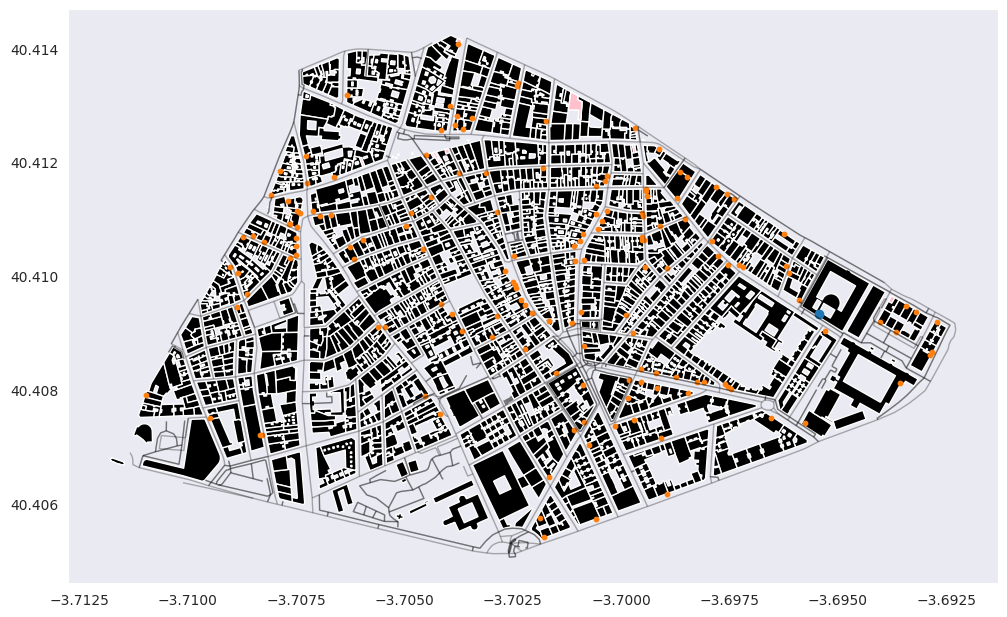

In [9]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

In [ ]:
# we're adding a red dot on the map

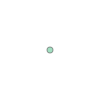

In [10]:
coords = (2.2011003,41.3989949)
p = Point(coords)
p

In [11]:
print(p.x, p.y)

2.2011003 41.3989949


In [ ]:
# we make sure the crs of the point takes the same crs of the map

In [12]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

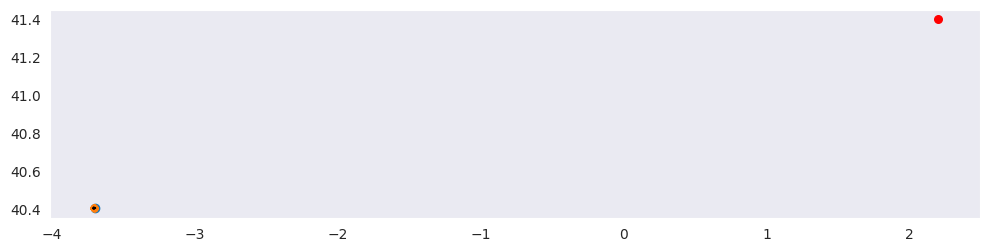

In [13]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
# if a place is in their library then we can extract it specifically

In [14]:
our_place = "Casino l'Aliança del Poblenou"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,geometry,address
0,POINT (2.20336 41.39986),"Casino l'Aliança del Poblenou, Rambla del Pobl..."


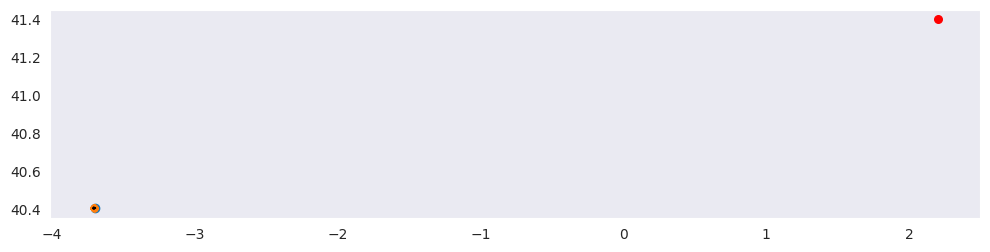

In [15]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [16]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


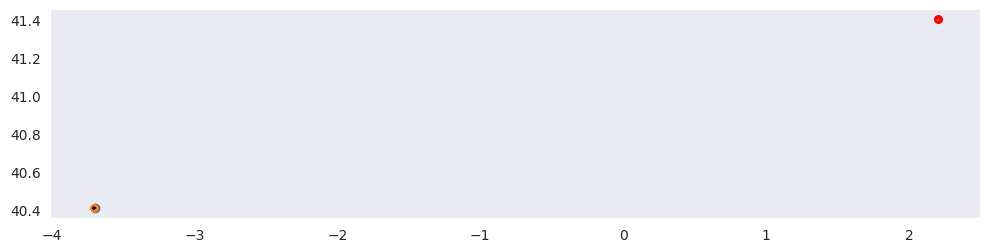

In [17]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
# defining which restaurants we will consider as "accessible"

In [18]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

ValueError: aspect must be finite and positive 

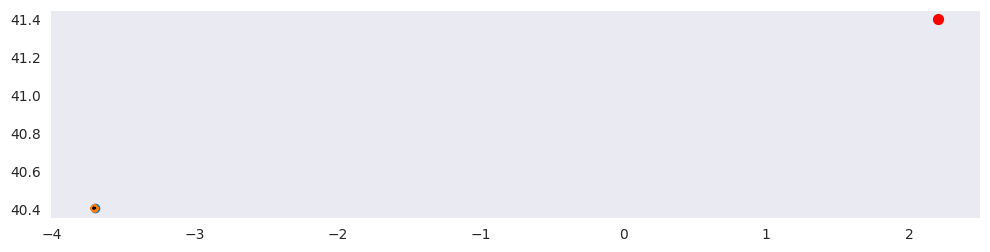

In [19]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
# we define both points and then use shortest distance

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

### 🕸 Walkability analysis

How far can you reach from a place on foot?

In [ ]:
# we can't calculate it from any point (like the iaac node we added) we have to check what's the nearest node on the OMNx network and we calculate from that

In [ ]:
# getting iaac node from the graph: (the node we wanna calculate distances from)
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only: (we cut the graph according where we can walk)
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.